In [18]:
datadir ='/Users/krithigamurugavel/Downloads/gem5_validation_project/Spring2020/Hardware_values/'

In [19]:
%matplotlib notebook
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import os

In [20]:
import matplotlib

In [21]:
system_name = ['gem5','pcm']
calibs = 'Uncalib'

all_benchmarks = ['CCa','CCe','CCm','CCh_st','CRm','CRf','CF1','CS1','CS3','EI','EF','ED1','EM1','EM5',
                     'DP1d','DP1f','DPcvt','DPTd','DPT','MI','MIM','MIM2','MIP','MC','MCS','MI','MIM','MIM2','MIP','MD','ML2','ML2_BW_ld',
                        'ML2_BW_st','MM']

zm_benchmarks = ['CCa','CCe','CCm','CCh_st','CRm','CRf','CRd','CS1','CS3','EI','EF','ED1','EM1','EM5','MI','MC'
                 ,'MCS','MI','MD','MIM','MIM2']

control_cond_benchmarks = ['CCa','CCe','CCm','CCh_st','CCl']

control_benchmarks = ['CRf','CRm','CRd','CS1','CS3']

memory_benchmarks = ['MC','MCS','MI','MIM','MIM2','MD']

mcs =['MC','MCS']

execution_benchmarks = ['EI','EF','ED1','EM1','EM5']


In [22]:
#Function to extract stats
def gem5GetStat(filename, stat):
    filename = os.path.join(datadir, '',filename, 'stats.txt').replace('\\','/')
    with open(filename) as f:
        r = f.read()
        if len(r) < 10: return 0.0
        start = r.find(stat) + len(stat) + 1
        end = r.find('#', start)
       # print(r[start:end])
        return float(r[start:end])

In [23]:
#Function to extract stats from PCM
def pcmGetStat(filename, stat):
    filename = os.path.join(datadir, '', filename, 'stats.txt').replace('\\','/')
    with open(filename) as f:
        r = f.read()
        if len(r) < 10: return 0.0
        start = r.find(stat) + len(stat) + 2
        end = r.find('\n', start)
       # print(r[start:end])
        return float(r[start:end])


## GEM5 DATAFRAME

In [37]:
rows = []
for bm in zm_benchmarks:
    rows.append([bm,gem5GetStat(system_name[0]+'/'+calibs+'/'+bm,'sim_ticks')/333, #1000
                   gem5GetStat(system_name[0]+'/'+calibs+'/'+bm,'sim_insts'),
                   gem5GetStat(system_name[0]+'/'+calibs+'/'+bm,'sim_ops'),
                   gem5GetStat(system_name[0]+'/'+calibs+'/'+bm,'host_op_rate'),
                   gem5GetStat(system_name[0]+'/'+calibs+'/'+bm,'system.cpu.dcache.overall_miss_rate::total'),
                   gem5GetStat(system_name[0]+'/'+calibs+'/'+bm,'system.cpu.ipc'),
                   gem5GetStat(system_name[0]+'/'+calibs+'/'+bm,'system.cpu.branchPred.condPredicted'),
                   gem5GetStat(system_name[0]+'/'+calibs+'/'+bm,'system.cpu.branchPred.condIncorrect'),
                   gem5GetStat(system_name[0]+'/'+calibs+'/'+bm,'system.cpu.commit.branchMispredicts'),
                   gem5GetStat(system_name[0]+'/'+calibs+'/'+bm,'system.cpu.commit.branches'),
                   gem5GetStat(system_name[0]+'/'+calibs+'/'+bm,'system.cpu.dcache.overall_misses::total'),
                 gem5GetStat(system_name[0]+'/'+calibs+'/'+bm,'system.cpu.dcache.overall_hits::total'),
                   gem5GetStat(system_name[0]+'/'+calibs+'/'+bm,'system.cpu.dcache.overall_miss_latency::total')
                ])

gem5_df = pd.DataFrame(rows, columns=['benchmark','cycles', 'instructions', 'ops','host_op_rate', 'overall_missrate',
                                     'ipc','CondPred','CondIndirect','Total_mispred','Total_branches','overall_l1d_miss','overall_l1d_hits','overall_l1_latency'])
gem5_df['Cond_branch_mispred'] = gem5_df['CondIndirect']/gem5_df['CondPred']
gem5_df['Total_branch_mispred'] =gem5_df['Total_mispred']/gem5_df['Total_branches']
print(gem5_df)






   benchmark        cycles  instructions          ops  host_op_rate  \
0        CCa  1.433032e+06     2578123.0    4644457.0      466531.0   
1        CCe  1.042698e+05       59534.0     123437.0      287078.0   
2        CCm  1.051905e+05       63564.0     119178.0      305488.0   
3     CCh_st  1.235056e+05       63628.0     127502.0      244214.0   
4        CRm  1.692742e+05       67921.0     114830.0      140355.0   
5        CRf  1.599857e+05      144579.0     313823.0      355457.0   
6        CRd  4.727609e+07    80436344.0  163942401.0      420713.0   
7        CS1  8.674990e+04       12783.0      24945.0      108298.0   
8        CS3  2.230182e+05      115823.0     256049.0      242733.0   
9         EI  3.512612e+06     9006142.0   13012481.0      501309.0   
10        EF  4.368933e+06    10006148.0   13012533.0      467754.0   
11       ED1  1.553368e+07     5006126.0   38012465.0      471852.0   
12       EM1  4.370342e+06     4006123.0   10012459.0      461397.0   
13    

## PCM DATAFRAME

In [15]:
rows =[]

#IPC,Branch_total, branch_total_miss,Cond_total,Cond_Miss,Memory_loads_miss, Memory__FB_hits, Total_load_memory,
#RFO_L2hits,RFO_l2miss, Total_store

for bm in control_benchmarks:
    rows.append([bm,pcmGetStat(system_name[1]+'/'+'microbench_all'+'/'+bm,'IPC'),
                    pcmGetStat(system_name[1]+'/'+'microbench_all'+'/'+bm,'BRANCH_TOTAL_INSTR_RETIRED_events'),
                    pcmGetStat(system_name[1]+'/'+'microbench_all'+'/'+bm,'BRANCH_MISSES_TOTAL_events'),
                    None,None,
                    None,None,None,None,None,None
                ])
    
for bm in control_cond_benchmarks:
    rows.append([bm,pcmGetStat(system_name[1]+'/'+'microbench_all'+'/'+bm, 'IPC'),
                 None,None,
                 pcmGetStat(system_name[1]+'/'+'microbench_all'+'/'+bm,'BRANCH_COND_INSTR_RETIRED_events'),
                 pcmGetStat(system_name[1]+'/'+'microbench_all'+'/'+bm,'BRANCH_MISSES_RETIRED_events'),  
                 None,None,None,None,None,None
                ])
    
for bm in execution_benchmarks:
    rows.append([bm,pcmGetStat(system_name[1]+'/'+'microbench_all'+'/'+bm, 'IPC'),
                 None,None,None,None,
                 None,None,None,None,None,None
                ])
    
for bm in memory_benchmarks:
        rows.append([bm,pcmGetStat(system_name[1]+'/'+'microbench_all'+'/'+bm, 'IPC'),
                     None,None,
                     None,None,
                     None,None,None,None,None,None])
        
for bm in memory_benchmarks:
    rows.append([bm,None,
                    None,None,
                    None,None,
                    pcmGetStat(system_name[1]+'/'+'L1D_benchmarks'+'/'+bm,'MEM_LOAD_RETIRED_L1_MISS'),
                    pcmGetStat(system_name[1]+'/'+'L1D_benchmarks'+'/'+bm,'MEM_LOAD_RETIRED_FB_HIT'),
                    pcmGetStat(system_name[1]+'/'+'L1D_benchmarks'+'/'+bm,'MEM_INST_RETIRED_ALL_LOADS'),
                    pcmGetStat(system_name[1]+'/'+'L1D_benchmarks'+'/'+bm,'RFO_L2HITS'),
                    pcmGetStat(system_name[1]+'/'+'L1D_benchmarks'+'/'+bm,'RFO_L2MISS'),
                    pcmGetStat(system_name[1]+'/'+'L1D_benchmarks'+'/'+bm,'MEM_INST_RETIRED_ALL_STORES'),
                ])
        

pcm_df = pd.DataFrame(rows, columns=['benchmark',
                                     'ipc','Total_branches','Total_mispred','CondTotal','CondPred','L1_load_miss','FB_hit',
                                     'Total_loads','RFO_L2_hits','RFO_L2_miss','Total_stores'])

pcm_df['Total_branch_mispred'] = pcm_df['Total_mispred']/pcm_df['Total_branches']

pcm_df['Cond_branch_mispred'] =pcm_df['CondPred']/pcm_df['CondTotal']

pcm_df['Total_L1_misses'] = (pcm_df['L1_load_miss'] - pcm_df['FB_hit']) + (pcm_df['RFO_L2_hits'] + pcm_df['RFO_L2_miss']) 

pcm_df['Total_access'] = (pcm_df['Total_loads']+pcm_df['Total_stores'])

pcm_df['L1_missrate'] = pcm_df['Total_L1_misses']/pcm_df['Total_access']


In [119]:
print(pcm_df)

   benchmark       ipc  Total_branches  Total_mispred  CondTotal  CondPred  \
0        CRf  1.348720         41170.0          349.0        NaN       NaN   
1        CRm  0.860635         15339.0         1440.0        NaN       NaN   
2        CRd  2.311780      21505524.0       144562.0        NaN       NaN   
3        CS1  1.060510         18187.0          146.0        NaN       NaN   
4        CS3  2.230400        532687.0         1259.0        NaN       NaN   
5        CCa  1.190300             NaN            NaN   130681.0     559.0   
6        CCe  2.221530             NaN            NaN   259212.0     661.0   
7        CCm  1.649370             NaN            NaN   258183.0     576.0   
8     CCh_st  2.497010             NaN            NaN   258681.0     553.0   
9        CCl  3.677930             NaN            NaN   130681.0     566.0   
10        EI  2.864130             NaN            NaN        NaN       NaN   
11        EF  2.451400             NaN            NaN        NaN

In [24]:
## Stacked Graph
def doplot_stacked_benchmarks(benchmarks,benchmark_names,stat_pcm,stat_gem5):
    system = system_name
    fig,ax = plt.subplots()
    i = 0
    for bm in benchmarks:
            d=pcm_df[pcm_df['benchmark']==bm]
            g=gem5_df[gem5_df['benchmark']==bm]
            ax.bar(i,d[stat_pcm], color='C'+str(1))
            ax.bar(i,g[stat_gem5], color='C'+str(0))
            i=i+1
        
    for i,s in enumerate(system):
        ax.bar(0,0,color='C'+str(i), label=s)
    new_names = benchmark_names + benchmark_names + benchmark_names
    plt.xticks(np.arange(len(benchmark_names)), benchmark_names, rotation=40, ha='right')

In [13]:
##Graph
def doplot_benchmarks(benchmarks,benchmark_names,stat_pcm,stat_gem5):
    system = system_name
    fig,ax = plt.subplots()
    i = 0
    for bm in benchmarks:
        d=pcm_df[pcm_df['benchmark']==bm]
        g=gem5_df[gem5_df['benchmark']==bm]
        ax.bar(i,d[stat_pcm], color='C'+str(1))
        i=i+1
        ax.bar(i,g[stat_gem5], color='C'+str(0))
        i=i+2
    for i,s in enumerate(system):
        ax.bar(0,0,color='C'+str(i), label=s)
    plt.xticks(np.arange(len(benchmark_names))*(len(system)+1)+i/2, benchmark_names, rotation=40, ha='right')

In [38]:
    test1 = gem5_df[gem5_df['benchmark']=='MC']
    test2 = pcm_df[pcm_df['benchmark']=='MC']
    print(test1)
    print("\nhardware values \n")
    print(test2)

   benchmark        cycles  instructions       ops  host_op_rate  \
15        MC  269186.12012      120824.0  241862.0      207654.0   

    overall_missrate       ipc  CondPred  CondIndirect  Total_mispred  \
15          0.168682  0.385497   11653.0         712.0          781.0   

    Total_branches  overall_l1d_miss  overall_l1d_hits  overall_l1_latency  \
15          9416.0           13782.0           67922.0         124387978.0   

    Cond_branch_mispred  Total_branch_mispred  
15               0.0611              0.082944  

hardware values 

   benchmark       ipc  Total_branches  Total_mispred  CondTotal  CondPred  \
15        MC  0.384913             NaN            NaN        NaN       NaN   
21        MC       NaN             NaN            NaN        NaN       NaN   

    L1_load_miss  FB_hit  Total_loads  RFO_L2_hits  RFO_L2_miss  Total_stores  \
15           NaN     NaN          NaN          NaN          NaN           NaN   
21       80538.0    51.0      80755.0          

## IPC

<IPython.core.display.Javascript object>


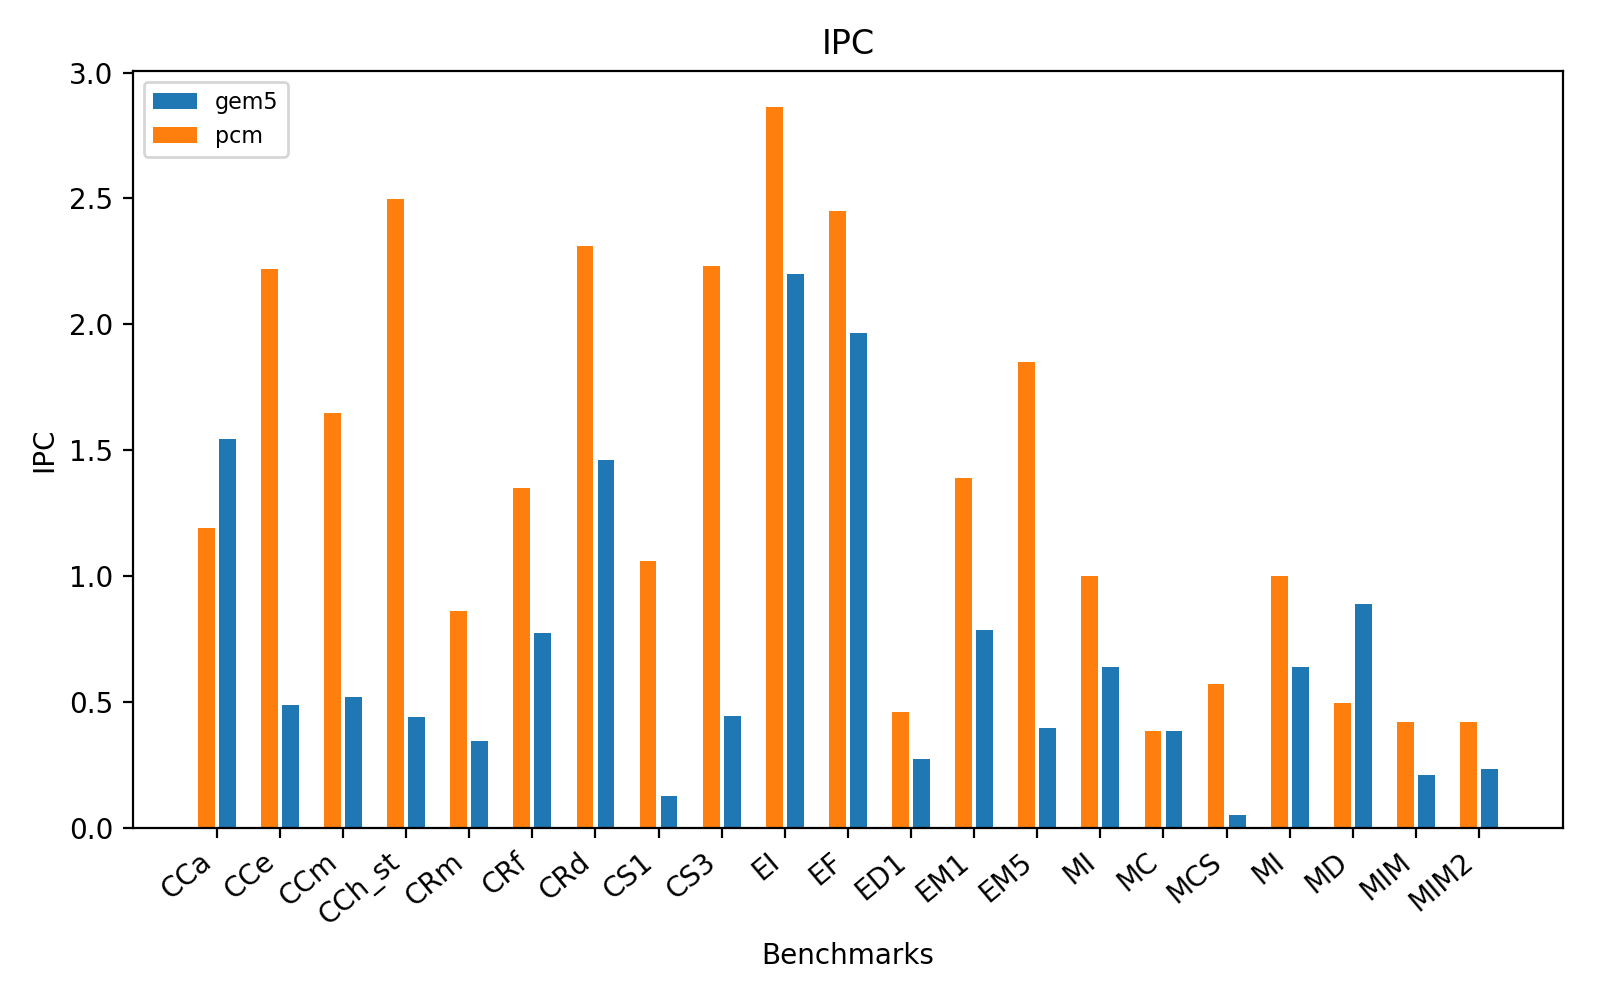

In [41]:
#IPC

benchmarks = zm_benchmarks
benchmark_names = zm_benchmarks
fig_size = plt.rcParams["figure.figsize"]
fig_size[0] = 8
fig_size[1] = 5
plt.rcParams["figure.figsize"] = fig_size
doplot_benchmarks(benchmarks,benchmark_names,'ipc','ipc')
plt.ylabel('IPC')
plt.xlabel('Benchmarks')
plt.legend(loc=2, prop={'size': 8})
plt.title('IPC')
plt.tight_layout()
plt.savefig('IPC_hw+gem5.png', format='png', dpi=600)


## Control conditonal branch misses

<IPython.core.display.Javascript object>


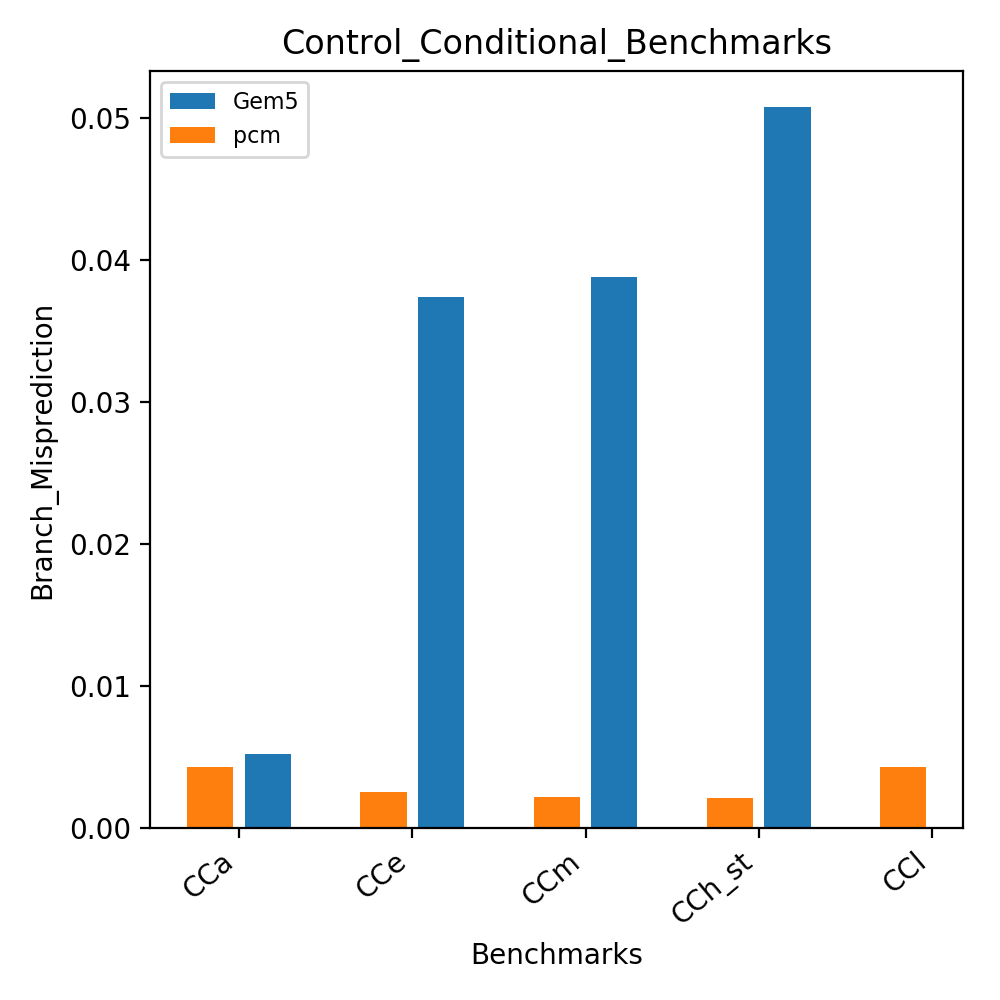

In [267]:
#Control condiitonal branch misses

benchmarks = control_cond_benchmarks
benchmark_names = control_cond_benchmarks
fig_size = plt.rcParams["figure.figsize"]
fig_size[0] = 5
fig_size[1] = 5
plt.rcParams["figure.figsize"] = fig_size
doplot_benchmarks(benchmarks,benchmark_names,'Cond_branch_mispred','Cond_branch_mispred')
plt.ylabel('Branch_Misprediction')
plt.xlabel('Benchmarks')
plt.legend(loc=2, prop={'size': 8})
plt.title('Control_Conditional_Benchmarks')
plt.tight_layout()
plt.savefig('Branch_Misprediction_Cc_hw+gem5.png', format='png', dpi=600)

## Control Branch misses

<IPython.core.display.Javascript object>


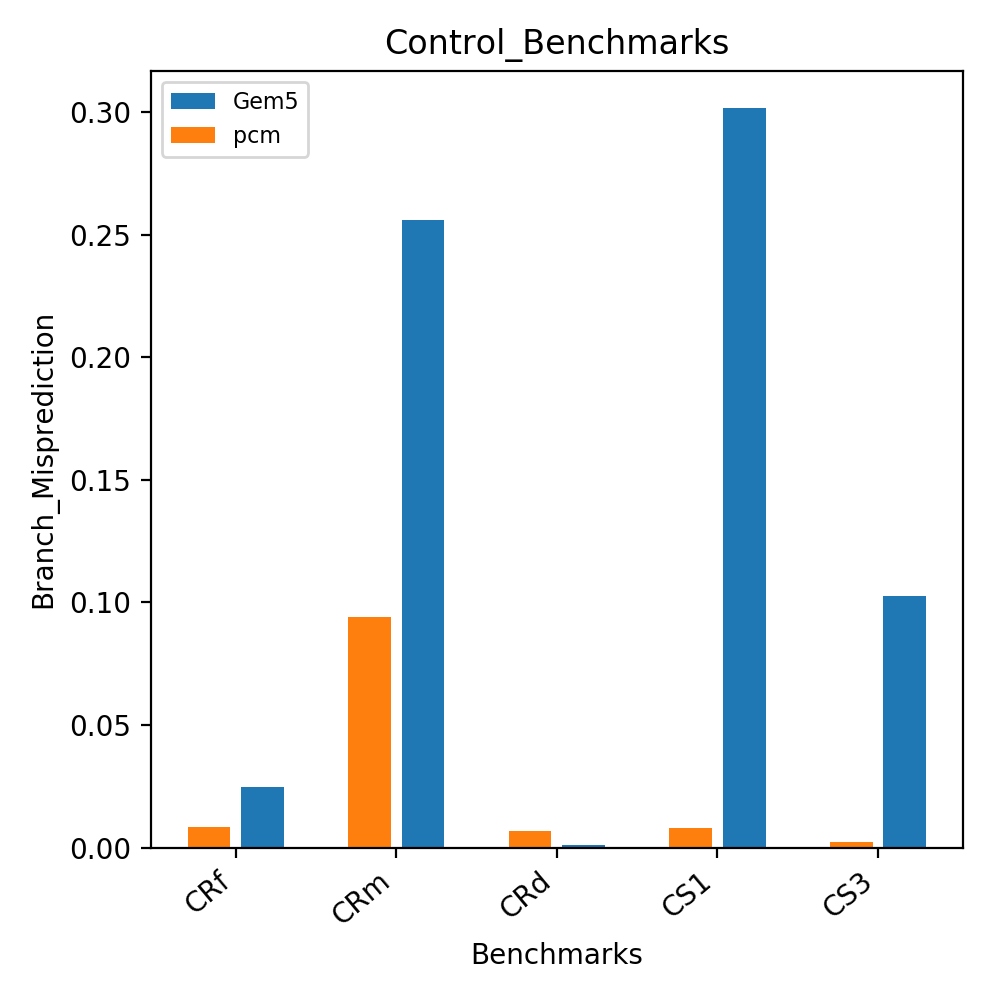

In [79]:
#Control Branch misses

benchmarks = control_benchmarks
benchmark_names = control_benchmarks
fig_size = plt.rcParams["figure.figsize"]
fig_size[0] = 5
fig_size[1] = 5
plt.rcParams["figure.figsize"] = fig_size
doplot_benchmarks(benchmarks,benchmark_names,'Total_branch_mispred','Total_branch_mispred')
plt.ylabel('Branch_Misprediction')
plt.xlabel('Benchmarks')
plt.legend(loc=2, prop={'size': 8})
plt.title('Control_Benchmarks')
plt.tight_layout()
plt.savefig('Branch_Misprediction_hw+gem5.png', format='png', dpi=600)

## L1 misses

<IPython.core.display.Javascript object>


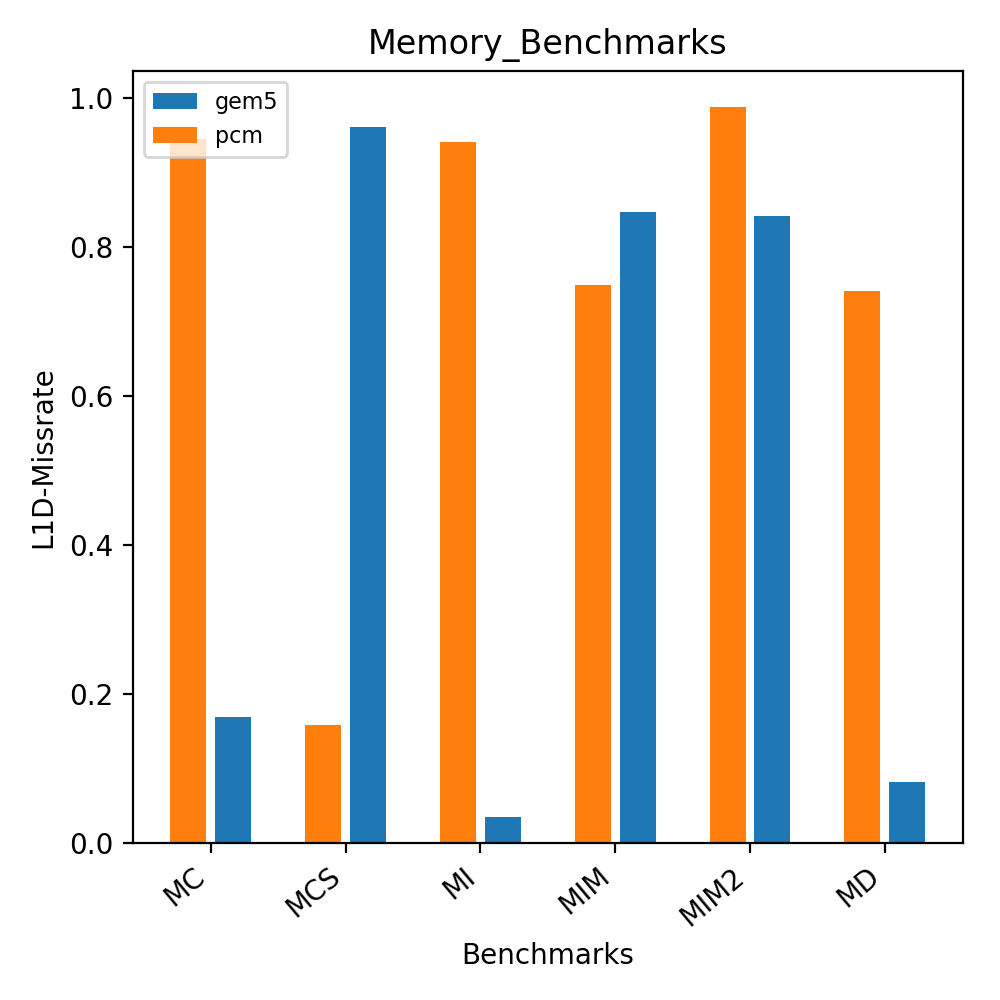

In [42]:
#L1 misses

benchmarks = memory_benchmarks
benchmark_names = memory_benchmarks
fig_size = plt.rcParams["figure.figsize"]
fig_size[0] = 5
fig_size[1] = 5
plt.rcParams["figure.figsize"] = fig_size
doplot_benchmarks(benchmarks,benchmark_names,'L1_missrate','overall_missrate')
plt.ylabel('L1D-Missrate')
plt.xlabel('Benchmarks')
plt.legend(loc=2, prop={'size': 8})
plt.title('Memory_Benchmarks')
plt.tight_layout()
plt.savefig('Memory_hw+gem5.png', format='png', dpi=600)

## --------------------------------------------------------------------------------------------------------
# Control Benchmarks Analysis

In [ ]:
iters = ['1M','5M','1.7M','3M','2.5M','7.5M']

In [93]:
#Control Benchmark:

rows = []
for i in iters:
    for bm in control_cond_benchmarks:
        rows.append([i,bm,gem5GetStat('control_iter'+'/'+i+'/'+system_name[0]+'/'+calibs+'/'+bm,'sim_ticks')/333, #1000
                       gem5GetStat('control_iter'+'/'+i+'/'+system_name[0]+'/'+calibs+'/'+bm,'sim_insts'),
                       gem5GetStat('control_iter'+'/'+i+'/'+system_name[0]+'/'+calibs+'/'+bm,'sim_ops'),
                       gem5GetStat('control_iter'+'/'+i+'/'+system_name[0]+'/'+calibs+'/'+bm,'host_op_rate'),
                       gem5GetStat('control_iter'+'/'+i+'/'+system_name[0]+'/'+calibs+'/'+bm,'system.cpu.dcache.overall_miss_rate::total'),
                       gem5GetStat('control_iter'+'/'+i+'/'+system_name[0]+'/'+calibs+'/'+bm,'system.cpu.ipc'),
                       gem5GetStat('control_iter'+'/'+i+'/'+system_name[0]+'/'+calibs+'/'+bm,'system.cpu.branchPred.condPredicted'),
                       gem5GetStat('control_iter'+'/'+i+'/'+system_name[0]+'/'+calibs+'/'+bm,'system.cpu.branchPred.condIncorrect'),
                       gem5GetStat('control_iter'+'/'+i+'/'+system_name[0]+'/'+calibs+'/'+bm,'system.cpu.commit.branchMispredicts'),
                       gem5GetStat('control_iter'+'/'+i+'/'+system_name[0]+'/'+calibs+'/'+bm,'system.cpu.commit.branches')
                    ])

gem5_df1 = pd.DataFrame(rows, columns=['itr','benchmark','cycles', 'instructions', 'ops','host_op_rate', 'overall_missrate',
                                     'ipc','CondPred','CondIndirect','Total_mispred','Total_branches'])
gem5_df1['Cond_branch_mispred'] = gem5_df1['CondIndirect']/gem5_df1['CondPred']
gem5_df1['Total_branch_mispred'] =gem5_df1['Total_mispred']/gem5_df1['Total_branches']


    

     itr benchmark        cycles  instructions         ops  host_op_rate  \
0     1M       CCa  1.433032e+06     2578123.0   4644457.0      466531.0   
1     1M       CCe  1.042698e+05       59534.0    123437.0      287078.0   
2     1M       CCm  1.051905e+05       63564.0    119178.0      305488.0   
3     1M    CCh_st  1.235056e+05       63628.0    127502.0      244214.0   
4     1M       CCl  8.433822e+04       20510.0     39189.0      167267.0   
5     5M       CCa  1.433032e+06     2578123.0   4644457.0      470416.0   
6     5M       CCe  1.845211e+06     3344126.0   6948461.0      435689.0   
7     5M       CCm  1.838765e+06     3596124.0   6684458.0      517062.0   
8     5M    CCh_st  2.100183e+06     3600124.0   7202462.0      411372.0   
9     5M       CCl  1.841378e+06     3602126.0   6694461.0      449419.0   
10  1.7M       CCa  5.510988e+05      906323.0   1633657.0      436467.0   
11  1.7M       CCe  6.951990e+05     1174426.0   2440061.0      436361.0   
12  1.7M    

In [94]:
rows =[]

#IPC,Branch_total, branch_total_miss,Cond_total,Cond_Miss,Memory_loads_miss, Memory__FB_hits, Total_load_memory,
#RFO_L2hits,RFO_l2miss, Total_store

for i in iters:   
    for bm in control_cond_benchmarks:
        rows.append([i,bm,pcmGetStat('control_iter'+'/'+i+'/'+system_name[1]+'/'+'microbench_all'+'/'+bm, 'IPC'),
                     pcmGetStat('control_iter'+'/'+i+'/'+system_name[1]+'/'+'microbench_all'+'/'+bm,'BRANCH_COND_INSTR_RETIRED_events'),
                     pcmGetStat('control_iter'+'/'+i+'/'+system_name[1]+'/'+'microbench_all'+'/'+bm,'BRANCH_MISSES_RETIRED_events'),  
                    ])
    


pcm_df1 = pd.DataFrame(rows, columns=['itr','benchmark',
                                     'ipc','CondTotal','CondPred'
                                    ])

pcm_df1['Cond_branch_mispred'] =pcm_df1['CondPred']/pcm_df1['CondTotal']

print(pcm_df1)

     itr benchmark      ipc  CondTotal  CondPred  Cond_branch_mispred
0     1M       CCa  1.19030   130681.0     559.0             0.004278
1     1M       CCe  2.22153   259212.0     661.0             0.002550
2     1M       CCm  1.64937   258183.0     576.0             0.002231
3     1M    CCh_st  2.49701   258681.0     553.0             0.002138
4     1M       CCl  3.67793   130681.0     566.0             0.004331
5     5M       CCa  1.23427   517684.0    2068.0             0.003995
6     5M       CCe  2.51171  1029683.0    2183.0             0.002120
7     5M       CCm  1.72973  1027681.0    4070.0             0.003960
8     5M    CCh_st  2.74970  1029682.0     453.0             0.000440
9     5M       CCl  4.15537   517681.0    2065.0             0.003989
10  1.7M       CCa  1.20755   182283.0     768.0             0.004213
11  1.7M       CCe  2.40715   361483.0     844.0             0.002335
12  1.7M       CCm  1.70383   514681.0    2078.0             0.004037
13  1.7M    CCh_st  

In [95]:
def doplot_cc_benchmarks(itr,benchmarks,benchmark_names,stat_pcm,stat_gem5):
    system = system_name
    fig,ax = plt.subplots()
    i = 0
    for bm in benchmarks:
        d= pcm_df1[(pcm_df1['benchmark']==bm) & (pcm_df1['itr']==itr)]
        g=gem5_df1[(gem5_df1['benchmark']==bm) &(gem5_df1['itr']==itr)]
        ax.bar(i,d[stat_pcm], color='C'+str(1))
        i=i+1
        ax.bar(i,g[stat_gem5], color='C'+str(0))
        i=i+2
    for i,s in enumerate(system):
        ax.bar(0,0,color='C'+str(i), label=s)
    plt.xticks(np.arange(len(benchmark_names))*(len(system)+1)+i/2, benchmark_names, rotation=40, ha='right')

<IPython.core.display.Javascript object>


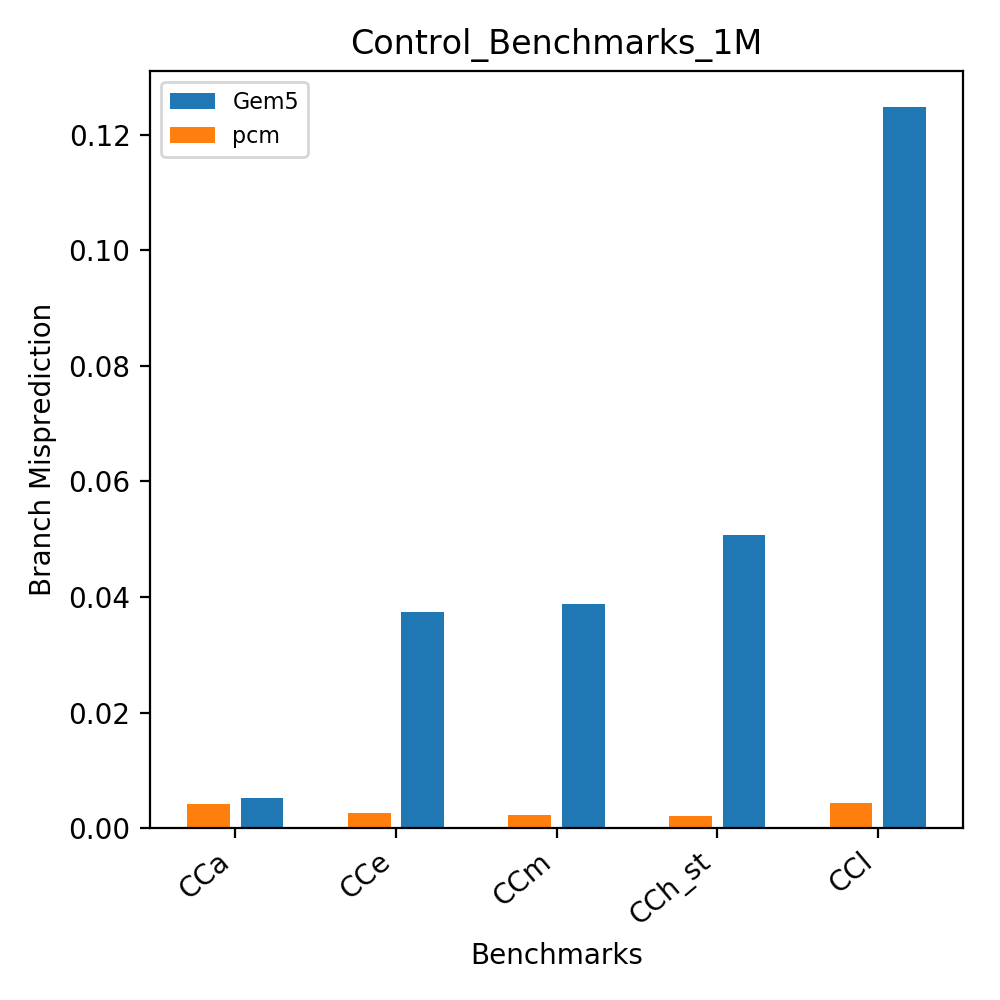

<IPython.core.display.Javascript object>


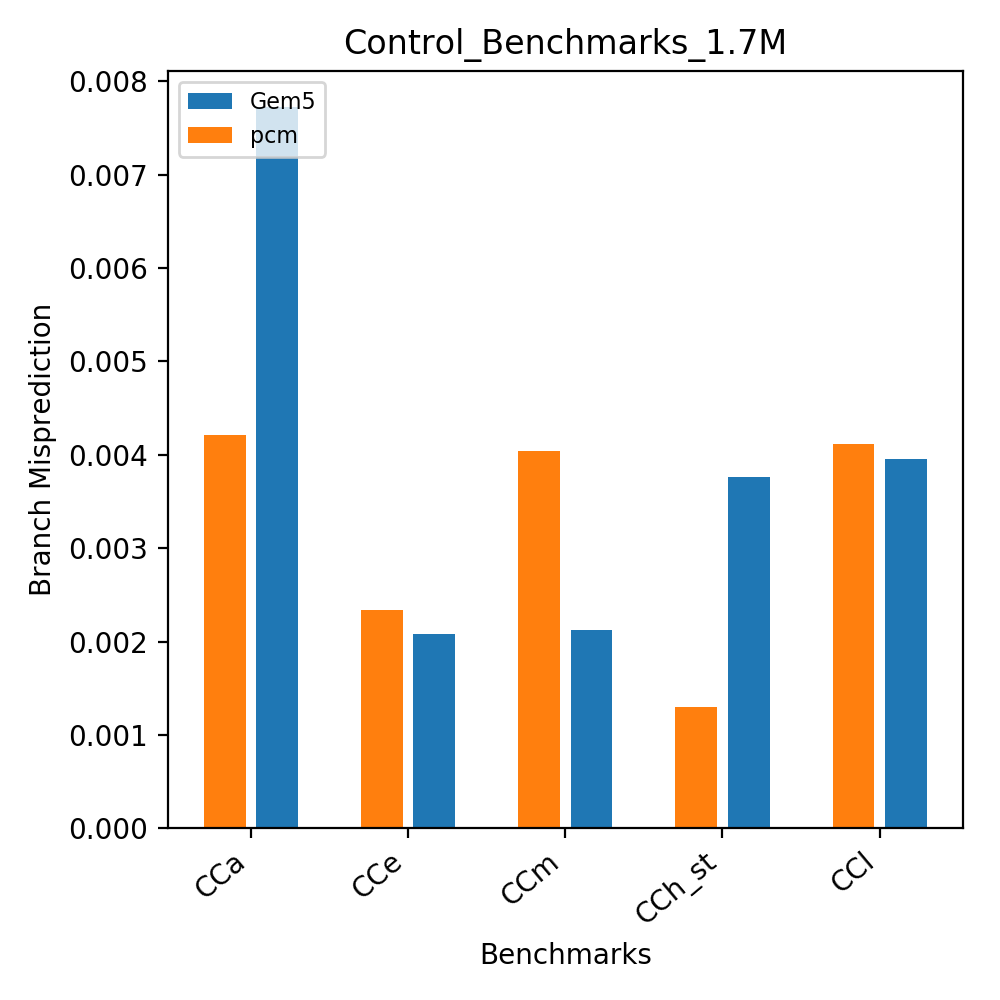

<IPython.core.display.Javascript object>


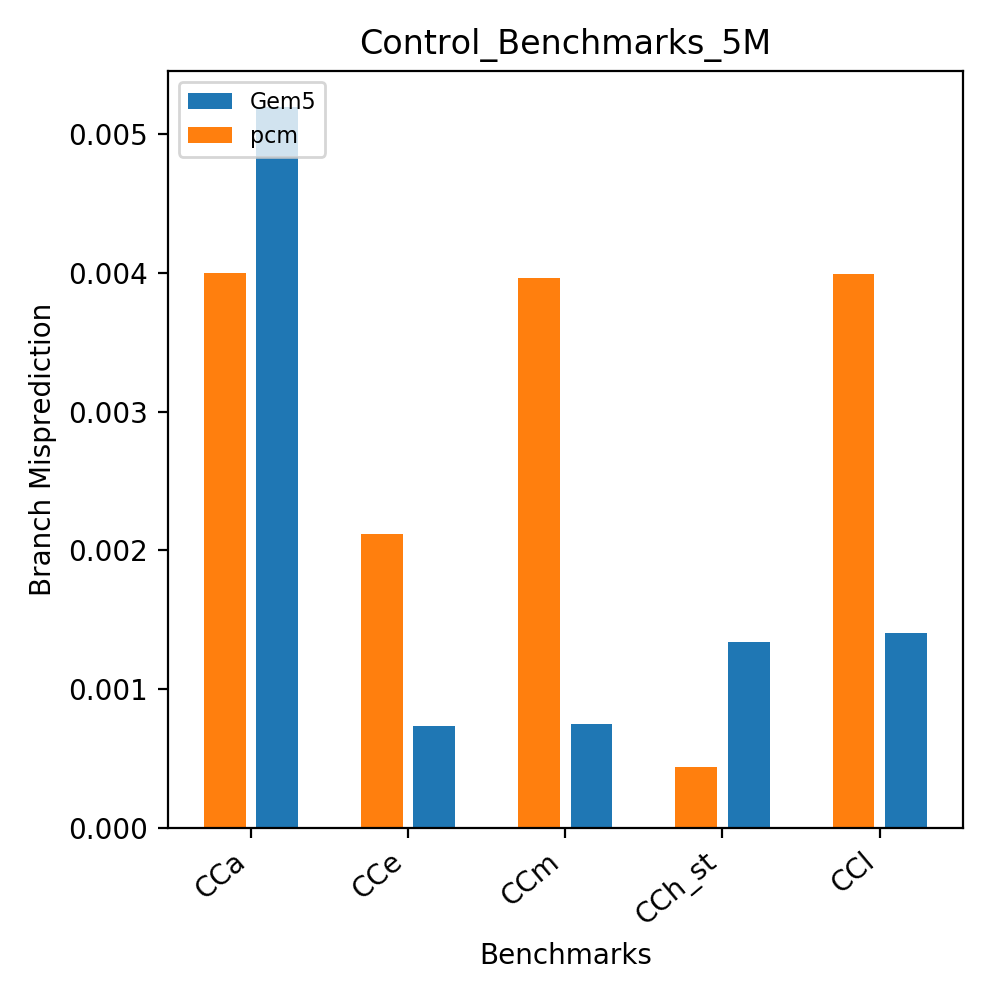

<IPython.core.display.Javascript object>


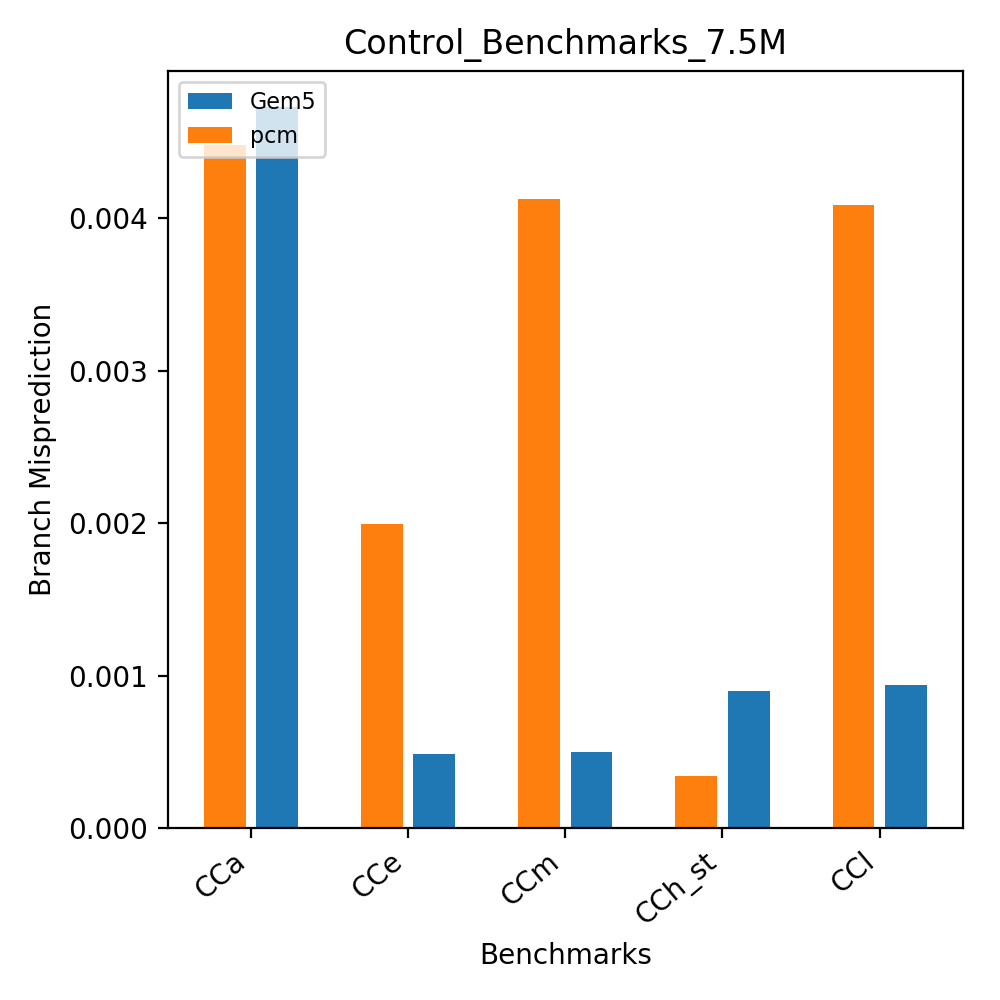

In [96]:

benchmarks = control_cond_benchmarks
benchmark_names = control_cond_benchmarks
fig_size = plt.rcParams["figure.figsize"]
fig_size[0] = 5
fig_size[1] = 5
plt.rcParams["figure.figsize"] = fig_size
doplot_cc_benchmarks('1M',benchmarks,benchmark_names,'Cond_branch_mispred','Cond_branch_mispred')
plt.ylabel('Branch Misprediction')
plt.xlabel('Benchmarks')
plt.legend(loc=2, prop={'size': 8})
plt.title('Control_Benchmarks_1M')
plt.tight_layout()
plt.savefig('Memory_hw+gem5_1M.png', format='png', dpi=600)
doplot_cc_benchmarks('1.7M',benchmarks,benchmark_names,'Cond_branch_mispred','Cond_branch_mispred')
plt.ylabel('Branch Misprediction')
plt.xlabel('Benchmarks')
plt.legend(loc=2, prop={'size': 8})
plt.title('Control_Benchmarks_1.7M')
plt.tight_layout()
plt.savefig('Memory_hw+gem5_1.7M.png', format='png', dpi=600)
doplot_cc_benchmarks('5M',benchmarks,benchmark_names,'Cond_branch_mispred','Cond_branch_mispred')
plt.ylabel('Branch Misprediction')
plt.xlabel('Benchmarks')
plt.legend(loc=2, prop={'size': 8})
plt.title('Control_Benchmarks_5M')
plt.tight_layout()
plt.savefig('Memory_hw+gem5_7.5M.png', format='png', dpi=600)
doplot_cc_benchmarks('7.5M',benchmarks,benchmark_names,'Cond_branch_mispred','Cond_branch_mispred')
plt.ylabel('Branch Misprediction')
plt.xlabel('Benchmarks')
plt.legend(loc=2, prop={'size': 8})
plt.title('Control_Benchmarks_7.5M')
plt.tight_layout()
plt.savefig('Memory_hw+gem5_7.5M.png', format='png', dpi=600)

In [80]:
iters_BP = ['1M','5M']

In [82]:
#Control Benchmark:
rows = []
for i in iters_BP:
    for bm in control_cond_benchmarks:
        rows.append([i,bm,gem5GetStat('control_iter_BP'+'/'+i+'/'+system_name[0]+'/'+calibs+'/'+bm,'sim_ticks')/333, #1000
                       gem5GetStat('control_iter_BP'+'/'+i+'/'+system_name[0]+'/'+calibs+'/'+bm,'sim_insts'),
                       gem5GetStat('control_iter_BP'+'/'+i+'/'+system_name[0]+'/'+calibs+'/'+bm,'sim_ops'),
                       gem5GetStat('control_iter_BP'+'/'+i+'/'+system_name[0]+'/'+calibs+'/'+bm,'host_op_rate'),
                       gem5GetStat('control_iter_BP'+'/'+i+'/'+system_name[0]+'/'+calibs+'/'+bm,'system.cpu.dcache.overall_miss_rate::total'),
                       gem5GetStat('control_iter_BP'+'/'+i+'/'+system_name[0]+'/'+calibs+'/'+bm,'system.cpu.ipc'),
                       gem5GetStat('control_iter_BP'+'/'+i+'/'+system_name[0]+'/'+calibs+'/'+bm,'system.cpu.branchPred.condPredicted'),
                       gem5GetStat('control_iter_BP'+'/'+i+'/'+system_name[0]+'/'+calibs+'/'+bm,'system.cpu.branchPred.condIncorrect'),
                       gem5GetStat('control_iter_BP'+'/'+i+'/'+system_name[0]+'/'+calibs+'/'+bm,'system.cpu.commit.branchMispredicts'),
                       gem5GetStat('control_iter_BP'+'/'+i+'/'+system_name[0]+'/'+calibs+'/'+bm,'system.cpu.commit.branches')
                    ])

gem5_df2 = pd.DataFrame(rows, columns=['itr','benchmark','cycles', 'instructions', 'ops','host_op_rate', 'overall_missrate',
                                     'ipc','CondPred','CondIndirect','Total_mispred','Total_branches'])
gem5_df2['Cond_branch_mispred'] = gem5_df2['CondIndirect']/gem5_df2['CondPred']
gem5_df2['Total_branch_mispred'] =gem5_df2['Total_mispred']/gem5_df2['Total_branches']
print(gem5_df2)


  itr benchmark        cycles  instructions        ops  host_op_rate  \
0  1M       CCa  4.148649e+05      649123.0  1170457.0      463603.0   
1  1M       CCe  5.257024e+05      840626.0  1746461.0      417644.0   
2  1M       CCm  5.255572e+05      903624.0  1680458.0      473002.0   
3  1M    CCh_st  6.243526e+05      904624.0  1809962.0      362651.0   
4  1M       CCl  5.267922e+05      905126.0  1682961.0      423311.0   
5  5M       CCa  1.432492e+06     2578123.0  4644457.0      492485.0   
6  5M       CCe  1.875561e+06     3344126.0  6948461.0      430957.0   
7  5M       CCm  1.869242e+06     3596124.0  6684458.0      529146.0   
8  5M    CCh_st  2.207015e+06     3600124.0  7202462.0      415201.0   
9  5M       CCl  1.875402e+06     3602126.0  6694461.0      415042.0   

   overall_missrate       ipc   CondPred  CondIndirect  Total_mispred  \
0          0.102823  1.343820   135177.0        1204.0         1251.0   
1          0.003242  1.373359   264176.0        1212.0       

In [108]:
##Graph
def doplot_pred_benchmarks(itr,benchmarks,benchmark_names,stat_pcm,stat_gem5):
    system = ['pcm','gem5_LTAGE','gem5_TBP']
    fig,ax = plt.subplots()
    i = 0
    for bm in benchmarks:
        d= pcm_df1[(pcm_df1['benchmark']==bm) & (pcm_df1['itr']==itr)]
        g=gem5_df1[(gem5_df1['benchmark']==bm) &(gem5_df1['itr']==itr)]
        g2=gem5_df2[(gem5_df2['benchmark']==bm) &(gem5_df2['itr']==itr)]
        ax.bar(i,d[stat_pcm], color='C'+str(0))
        i=i+1
        ax.bar(i,g[stat_gem5], color='C'+str(1))
        i=i+1
        ax.bar(i,g2[stat_gem5], color='C'+str(2))
        i=i+3
    for i,s in enumerate(system):
        ax.bar(0,0,color='C'+str(i), label=s)
    plt.xticks(np.arange(len(benchmark_names))*(len(system)+1+1)+i/2, benchmark_names, rotation=40, ha='right')

<IPython.core.display.Javascript object>


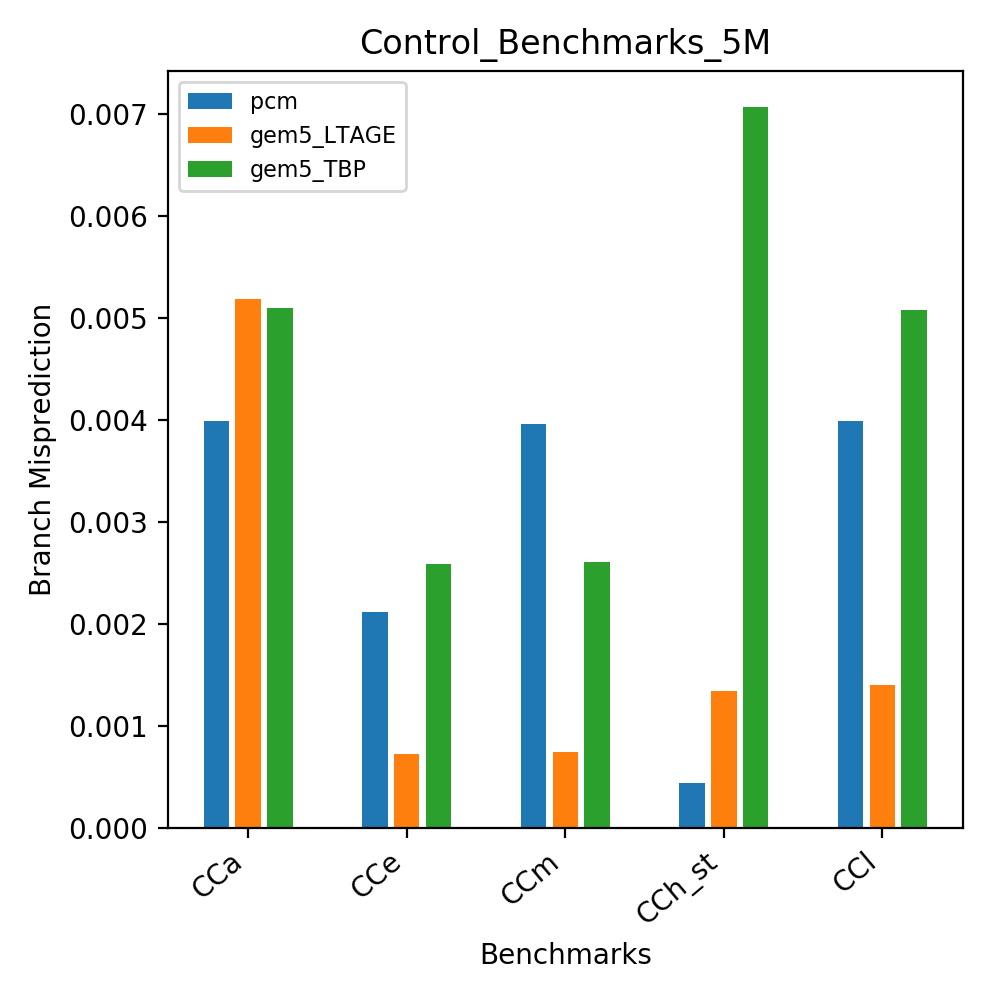

<IPython.core.display.Javascript object>


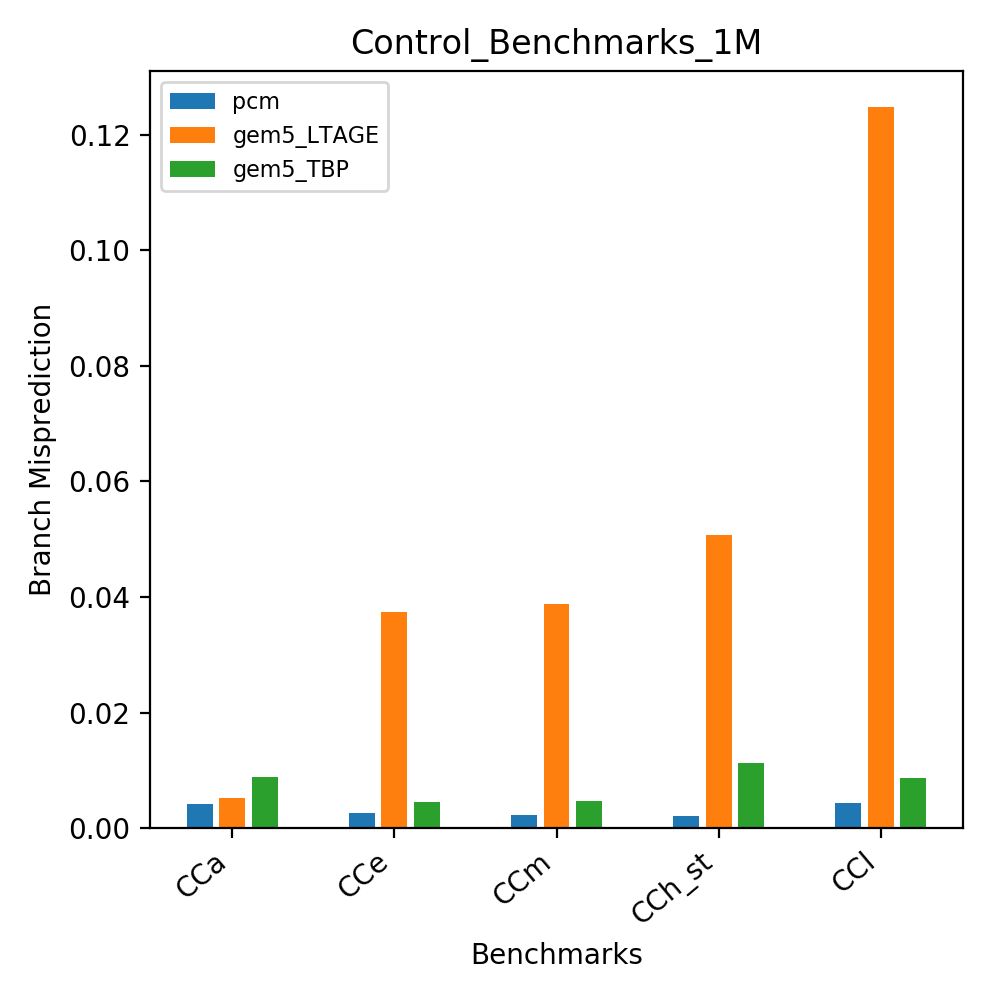

'-> because of initial warm up the LTAGE Does not perform really well for all benchmarks\n   -> It shd be seen as trade off between how big the benchmark is '

In [109]:
benchmarks = control_cond_benchmarks
benchmark_names = control_cond_benchmarks
fig_size = plt.rcParams["figure.figsize"]
fig_size[0] = 5
fig_size[1] = 5
plt.rcParams["figure.figsize"] = fig_size
doplot_pred_benchmarks('5M',benchmarks,benchmark_names,'Cond_branch_mispred','Cond_branch_mispred')
plt.ylabel('Branch Misprediction')
plt.xlabel('Benchmarks')
plt.legend(loc=2, prop={'size': 8})
plt.title('Control_Benchmarks_5M')
plt.tight_layout()
plt.savefig('Memory_hw+gem5_BP_5m.png', format='png', dpi=600)
doplot_pred_benchmarks('1M',benchmarks,benchmark_names,'Cond_branch_mispred','Cond_branch_mispred')
plt.ylabel('Branch Misprediction')
plt.xlabel('Benchmarks')
plt.legend(loc=2, prop={'size': 8})
plt.title('Control_Benchmarks_1M')
plt.tight_layout()
plt.savefig('Memory_hw+gem5_BP_1m.png', format='png', dpi=600)



In [ ]:
"""
    Not working in pcm : CF1
    CHnage all control benchmarks in pcm and run again."""

In [ ]:
"""-> because of initial warm up the LTAGE Does not perform really well for all benchmarks
   -> It shd be seen as trade off between how big the benchmark is """

## --------------------------------------------------------------------------------------------------------
# Memory Benchmarks Analysis

In [25]:
rows = []
for bm in memory_benchmarks:
    rows.append([bm,gem5GetStat(system_name[0]+'/'+'memory_bm'+'/'+calibs+'/'+bm,'sim_ticks')/333, #1000
                   gem5GetStat(system_name[0]+'/'+'memory_bm'+'/'+calibs+'/'+bm,'sim_insts'),
                   gem5GetStat(system_name[0]+'/'+'memory_bm'+'/'+calibs+'/'+bm,'sim_ops'),
                   gem5GetStat(system_name[0]+'/'+'memory_bm'+'/'+calibs+'/'+bm,'host_op_rate'),
                   gem5GetStat(system_name[0]+'/'+'memory_bm'+'/'+calibs+'/'+bm,'system.cpu.dcache.overall_miss_rate::total'),
                   gem5GetStat(system_name[0]+'/'+'memory_bm'+'/'+calibs+'/'+bm,'system.cpu.ipc'),
                   gem5GetStat(system_name[0]+'/'+'memory_bm'+'/'+calibs+'/'+bm,'system.cpu.dcache.overall_misses::total'),
                 gem5GetStat(system_name[0]+'/'+'memory_bm'+'/'+calibs+'/'+bm,'system.cpu.dcache.overall_hits::total'),
                   gem5GetStat(system_name[0]+'/'+'memory_bm'+'/'+calibs+'/'+bm,'system.cpu.dcache.overall_miss_latency::total')
                ])

gem5_df = pd.DataFrame(rows, columns=['benchmark','cycles', 'instructions', 'ops','host_op_rate', 'overall_missrate',
                                     'ipc','overall_l1d_miss','overall_l1d_hits','overall_l1_latency'])
print(gem5_df)

  benchmark        cycles  instructions       ops  host_op_rate  \
0        MC  2.695348e+05      120824.0  241862.0      190117.0   
1       MCS  2.235009e+06      137208.0  200902.0       47937.0   
2        MI  1.513155e+05      112850.0  217682.0      294580.0   
3       MIM  1.403745e+05       30927.0   64049.0      101760.0   
4      MIM2  1.229517e+05       30927.0   64049.0      125218.0   
5        MD  4.839206e+05      497917.0  842366.0      274181.0   

   overall_missrate       ipc  overall_l1d_miss  overall_l1d_hits  \
0          0.137160  0.384998           11206.0           70494.0   
1          0.961208  0.052726           74087.0            2990.0   
2          0.034956  0.640527            2410.0           66534.0   
3          0.847021  0.189221           16760.0            3027.0   
4          0.838545  0.216034           16599.0            3196.0   
5          0.081061  0.883698           10669.0          120948.0   

   overall_l1_latency  
0         119132442.0 

<IPython.core.display.Javascript object>


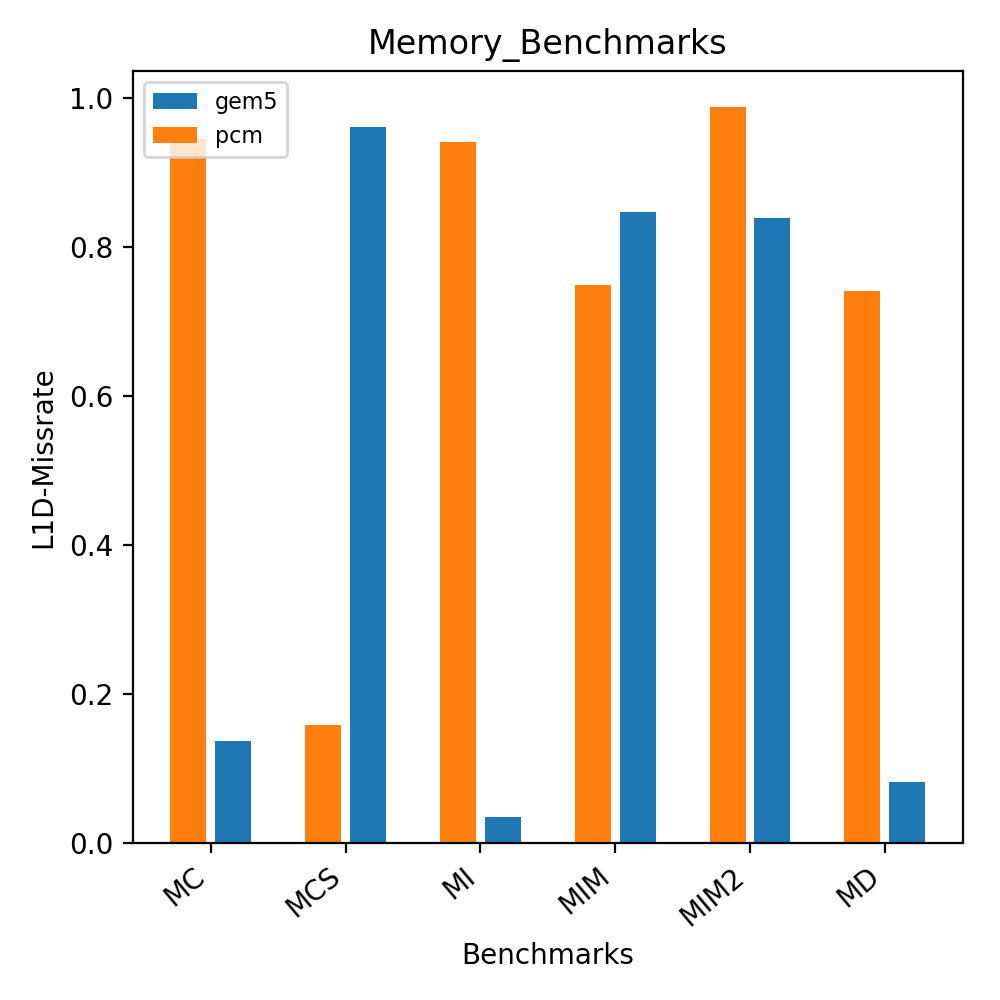

In [26]:
#L1 misses

benchmarks = memory_benchmarks
benchmark_names = memory_benchmarks
fig_size = plt.rcParams["figure.figsize"]
fig_size[0] = 5
fig_size[1] = 5
plt.rcParams["figure.figsize"] = fig_size
doplot_benchmarks(benchmarks,benchmark_names,'L1_missrate','overall_missrate')
plt.ylabel('L1D-Missrate')
plt.xlabel('Benchmarks')
plt.legend(loc=2, prop={'size': 8})
plt.title('Memory_Benchmarks')
plt.tight_layout()
plt.savefig('Memory_hw+gem5.png', format='png', dpi=600)